In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

# Import the full features from Features.ipynb

In [11]:
df = pd.read_csv('features.csv', sep='|', index_col=0)
df['Company'].value_counts()

Facebook          1977
Twitter            902
Alibaba            544
Groupon            426
General Motors     368
LinkedIn           193
Snapchat           185
Blue Apron         125
Fitbit             114
Etsy               104
Shake Shack        103
GoPro               91
Workday             90
Ferrari             46
Stitch Fix          33
Name: Company, dtype: int64

In [12]:
df.shape

(5301, 44)

## Tried Removing Facebook Since it Represented a Disproportionate Number of Instances

In [13]:
#df_woFB = df[df['Company'] != 'Facebook']
#df_woFB['Company'].value_counts()

In [14]:
## Replacing all the numbers in the text to 'NUM_' to simplify and reduce total featues
text_data = df['Headline'].replace('\d+', 'NUM_', regex=True)
#text_data = df['Headline']
#text_data = df_woFB['Headline'].replace('\d+', 'NUM_', regex=True)
#text_data.shape


In [15]:
# stop words are the words that will be ignored in the CountVectorizer
# Removed all of the names for the IPOs since they will repeated across headlines and create unwanted correlation
# One standard approach is to use 'english' only which eliminiates unimportant words (e.g. the, a, to, in,)
# my_stop_words allows us to define specific stop words and then combine with the standard english list through a union

my_stop_words = ('facebook', 'linkedin', 'groupon', 'snap', 'twitter', 'alibaba', 'group', 'holding', 'etsy', 'fitbit',
                'workday', 'gopro', 'blue', 'apron', 'holdings', 'ferrari', 'general', 'motors', 'shake', 'shack',
                'stitch', 'fix', 'tesla', 'motors', 'num_', 'ipo', 'negative', 'neutral', 'positive')
stop_words = text.ENGLISH_STOP_WORDS.union(my_stop_words)

In [16]:
# The CountVectorizer is a method that Scikit-learn provides that identifies all the unique words in the text creating
# a "bag of words".  Then each word is treated as a feature with the count of the number of times the word occurs in
# each individual instance (headlines in this case)

vectorizer = CountVectorizer(analyzer='word', stop_words=stop_words)

In [17]:
vectorizer.fit(text_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozenset({'therefore', 'forty', 'only', 'fill', 'gopro', 'amoungst', 'can', 'afterwards', 'whither', 'i', 'its', 'on', 'this', 'out', 'made', 'anyone', 'if', 'whereafter', 'top', 'hence', 'has', 'ltd', 'them', 'everyone', 'get', 'thick', 'inc', 'their', 'herein', 'he', 'should', 'therein...n', 'other', 'am', 'hundred', 'except', 'thin', 'first', 're', 'up', 'would', 'meanwhile', 'shake'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [18]:
vectorizer.get_feature_names()
#vectorizer.vocabulary_

['abandons',
 'abercrombie',
 'ability',
 'able',
 'abound',
 'abounding',
 'accel',
 'accelerate',
 'acceleration',
 'access',
 'accessibility',
 'accommodations',
 'according',
 'account',
 'accounting',
 'accounts',
 'accusations',
 'accused',
 'achievements',
 'achilles',
 'ackaman',
 'acquired',
 'acquisition',
 'acquisitions',
 'acsoi',
 'act',
 'action',
 'actions',
 'active',
 'activity',
 'ad',
 'adapt',
 'add',
 'added',
 'adding',
 'additional',
 'address',
 'addressed',
 'addressing',
 'adds',
 'admits',
 'adp',
 'adrs',
 'ads',
 'advance',
 'adventure',
 'advertis',
 'advertisers',
 'advertisi',
 'advertising',
 'advice',
 'advise',
 'adviser',
 'advisers',
 'advisory',
 'advocates',
 'affair',
 'affect',
 'affected',
 'affects',
 'affordable',
 'aflutter',
 'afraid',
 'aftermath',
 'aftershocks',
 'age',
 'agency',
 'agenda',
 'agent',
 'aggregate',
 'aggressive',
 'ago',
 'agreements',
 'agrees',
 'ah',
 'ahead',
 'ailing',
 'aim',
 'aiming',
 'aims',
 'ain',
 'air',
 'a

In [19]:
pd.DataFrame.from_dict(vectorizer.vocabulary_, orient='index').sort_values(by=0, ascending=False).head()

,0
œtwitter,4682
œquiet,4681
œmarried,4680
œlife,4679
œkick,4678


#### Transform to Document Term Matrix

In [20]:
dtm = vectorizer.transform(text_data)
dtm

<5301x4683 sparse matrix of type '<class 'numpy.int64'>'
	with 28952 stored elements in Compressed Sparse Row format>

In [21]:
Text_Features = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())
Text_Features.shape

(5301, 4683)

In [22]:
#Text_Features.to_csv('TEXT_FEATURES.csv')

In [23]:
# Merge the sentiment scores from the features.csv with the Text_Features created from the CountVectorizer to create
# the full set of features

features = df[['Word Count', 'PositiveScore', 'NegativeScore',
              'neutral', 'weakneg', 'weakpos', 'strongpos', 'strongneg']]
features = pd.merge(Text_Features, features, left_index=True, right_index=True)
features.head()

,abandons,abercrombie,ability,able,abound,abounding,accel,accelerate,acceleration,access,...,œquiet,œtwitter,Word Count,PositiveScore,NegativeScore,neutral,weakneg,weakpos,strongpos,strongneg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,358,0.0,0.0,6,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,515,0.0,0.0,2,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,288,0.0,0.0,6,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,583,0.0,0.0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,947,0.0,0.0,0,0,0,0,0


In [24]:
X = features
y = np.array(df['Label'].tolist())
#y = np.array(df_woFB['Label'].tolist())

In [25]:
# Standardizing all of the feature data

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [26]:
# Since there are so many features now (4,693) need to try to reduce the number to eliminate those that do not matter
# PCA requires you either select a value for k or set a % value which will then use the value k that retains the
# defined % of variance between the features.  Using 0.95 but could use 0.99 to 0.80.

from sklearn.decomposition import PCA
#pca = PCA(0.95)
pca = PCA().fit(X)
#pca.fit(X)

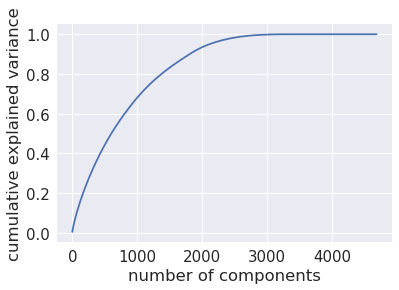

In [27]:
fig = plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
fig.savefig('pca_explained_variance.png')

In [28]:
pca = PCA(n_components=2500).fit(X)

In [29]:
X_pca = pca.transform(X)
print('Original shape:        ', X.shape)
print('Transformed shape:     ', X_pca.shape)

Original shape:         (5301, 4691)
Transformed shape:      (5301, 2500)


In [30]:
# Included this because without it some of the PCA variance ratios are negative and Naive Bayes cannot use negatives

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_pca)
X_pca = scaler.transform(X_pca)

In [31]:
#pca.n_components_
pca.explained_variance_ratio_

array([  3.36588493e-03,   2.30554529e-03,   2.05940917e-03, ...,
         5.15501436e-05,   5.12765683e-05,   5.09987738e-05])

In [32]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#X_pca = Text_Features
#y = np.array(df['Label'].tolist())
#len(y)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(3975, 2500) (3975,)


/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
nb = MultinomialNB()

In [34]:
X_pca

array([[ 0.00122128,  0.03114253,  0.01688875, ...,  0.47081365,
         0.46902727,  0.47363723],
       [ 0.00150587,  0.03127776,  0.01283045, ...,  0.46139419,
         0.51243954,  0.45501949],
       [ 0.00152821,  0.03093022,  0.01251211, ...,  0.47214678,
         0.62722909,  0.44170346],
       ..., 
       [ 0.00176389,  0.03020363,  0.01384004, ...,  0.57489058,
         0.476424  ,  0.48184182],
       [ 0.00178662,  0.03098578,  0.01361365, ...,  0.6085294 ,
         0.46683736,  0.48800886],
       [ 0.00184545,  0.03092815,  0.01511546, ...,  0.48764087,
         0.48834223,  0.47260076]])

In [35]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
y_pred_class = nb.predict(X_test)

In [37]:
#metrics.accuracy_score(y_test, y_pred_class)
metrics.accuracy_score(y_test, y_pred_class)

0.58069381598793368

In [38]:
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

   Negative       0.58      1.00      0.73       770
   Positive       0.00      0.00      0.00       556

avg / total       0.34      0.58      0.43      1326



/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Yellowbrick Classification Report

/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


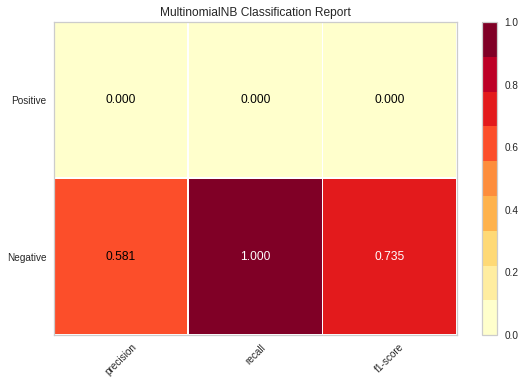

In [39]:
from yellowbrick.classifier import ClassificationReport
bayes = MultinomialNB()
visualizer = ClassificationReport(bayes, classes=['Negative', 'Positive'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

## Confusion Matrix

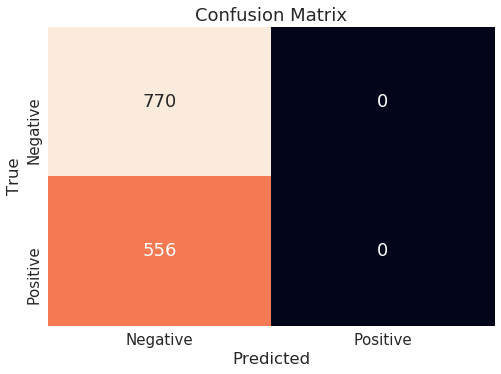

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()

In [41]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1, gamma=1)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
predicted = svc.predict(X_test)

In [42]:
metrics.accuracy_score(y_test, predicted)

0.66289592760180993

In [43]:
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

   Negative       0.69      0.75      0.72       770
   Positive       0.61      0.54      0.57       556

avg / total       0.66      0.66      0.66      1326



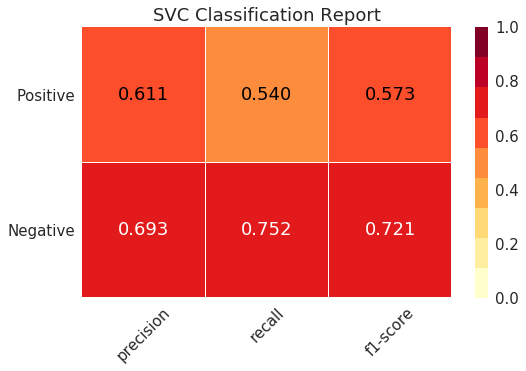

In [44]:
from yellowbrick.classifier import ClassificationReport
svc = SVC(kernel='linear', C=1, gamma=1)
visualizer = ClassificationReport(svc, classes=['Negative', 'Positive'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

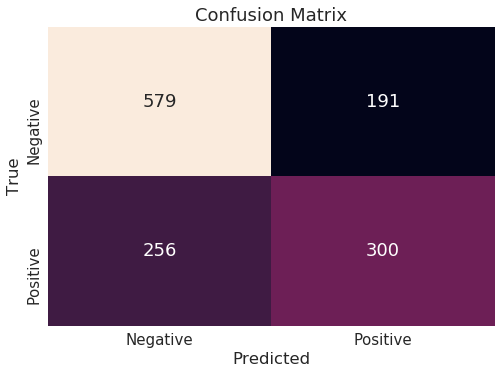

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()

In [46]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()
LSVC.fit(X_train, y_train)
LSVC.score(X_test, y_test)
L_predicted = LSVC.predict(X_test)

In [47]:
metrics.accuracy_score(y_test, L_predicted)

0.67571644042232282

In [48]:
print(metrics.classification_report(y_test, L_predicted))

             precision    recall  f1-score   support

   Negative       0.70      0.78      0.74       770
   Positive       0.64      0.53      0.58       556

avg / total       0.67      0.68      0.67      1326



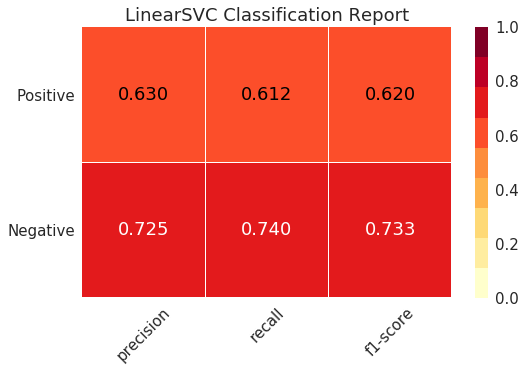

In [49]:
from yellowbrick.classifier import ClassificationReport
LSVC = LinearSVC()
visualizer = ClassificationReport(LSVC, classes=['Negative', 'Positive'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

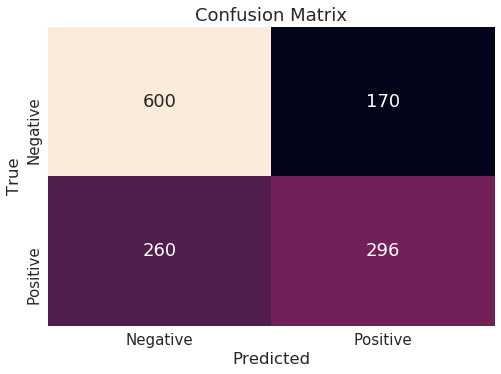

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, L_predicted)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()

## Making Predictions

In [87]:
new_text_data = pd.read_csv('new_text_data.csv', header=None, usecols=[1])
dtm2 = vectorizer.transform(new_text_data[1])
Text_Features2 = pd.DataFrame(dtm2.toarray(), columns=vectorizer.get_feature_names())
Text_Features2.shape

(367, 4683)

In [98]:
new_features_data = pd.read_csv('new_features_data2.csv')
new_features_data = new_features_data[:368]
new_features = new_features_data[['Word Count', 'PositiveScore', 'NegativeScore', 'neutral', 'weakneg',
                                       'weakpos', 'strongpos', 'strongneg']]
new_features = pd.merge(Text_Features2, new_features, left_index=True, right_index=True)
new_features.shape

(299, 4691)

In [99]:
new_features_data.head()

,Unnamed: 0,Headline,Source,Date,Word Count,Company,Ticker,PositiveScore,NegativeScore,neutral,weakneg,weakpos,strongpos,strongneg,Label
0,68,*DropBox Inc. Files for IPO,Dow Jones Institutional News,2/23/18,35.0,Dropbox,DBX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
1,69,"*Dropbox IPO Prices at $21 a Share, Above Expe...",Dow Jones Institutional News,3/22/18,25.0,Dropbox,DBX,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Positive
2,70,"*Dropbox Opens At $29, Above IPO Price of $21",Dow Jones Institutional News,3/23/18,23.0,Dropbox,DBX,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Positive
3,71,*Dropbox Revises IPO Terms to 36M Class A Comm...,Dow Jones Institutional News,3/21/18,53.0,Dropbox,DBX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
4,72,*Dropbox Sets IPO Terms at 36M Class A Common ...,Dow Jones Institutional News,3/12/18,53.0,Dropbox,DBX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive


In [100]:
from sklearn.preprocessing import StandardScaler
X_ = new_features
X_ = StandardScaler().fit_transform(X_)

In [110]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2500)
pca.fit(X_)

PCA(copy=True, iterated_power='auto', n_components=2500, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [111]:
from sklearn.datasets.samples_generator import make_blobs
X_pca, y = make_blobs(n_samples=299, centers=2, n_features=2500, random_state=1)

In [112]:
model = LinearSVC()
model.fit(X_pca, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [113]:
ynew = model.predict(X_pca)

In [114]:
len(ynew)

299

In [115]:
for i in range(len(new_features_data)-1):
    print('Actual = %s, Predicted = %s' % (new_features_data['Label'].loc[i], ynew[i]))

Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 0
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 0
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 0
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 0
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 0
Actual = Positive, Predicted = 0
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 0
Actual = Positive, Predicted = 0
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 0
Actual = Positive, Predicted = 0
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 0
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 1
Actual = Positive, Predicted = 1
Actual = P

## SGD

In [38]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [39]:
sgd.score(X_test, y_test)
y_predicted = sgd.predict(X_test)
metrics.accuracy_score(y_test, y_predicted)

0.41930618401206637

In [40]:
print(metrics.classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00       770
   Positive       0.42      1.00      0.59       556

avg / total       0.18      0.42      0.25      1326



/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


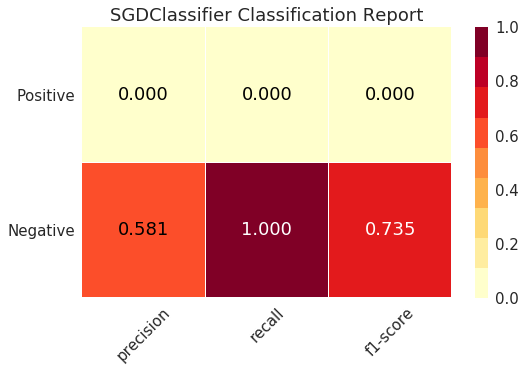

In [41]:
from yellowbrick.classifier import ClassificationReport
sgd = SGDClassifier()
visualizer = ClassificationReport(sgd, classes=['Negative', 'Positive'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

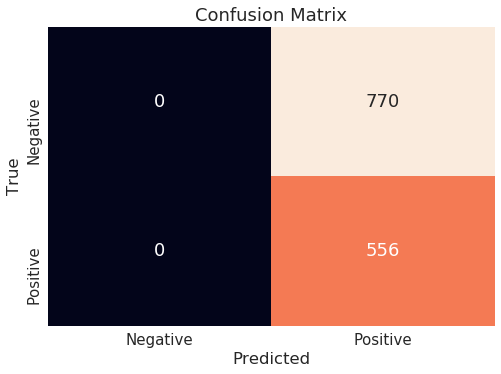

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()